In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set correct working directory
wd = os.getcwd()
print("Current working directory: ", wd)
if wd[-9:] == "notebooks": wd = wd[:-10]
else: print("Make sure your working directory is set to the student-performance folder.")
os.chdir(wd)
print("New working directory: ", os.getcwd())
from utils.loader_steve import load_level_group_X_y, load_all_X_y

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier



Current working directory:  /Users/marvin/workspace/kaggle_gameplay/student-performance
Make sure your working directory is set to the student-performance folder.
New working directory:  /Users/marvin/workspace/kaggle_gameplay/student-performance


In [3]:
# load data
# labels = pd.read_csv("data/processed/labels.csv")
# labels_q1_3 = labels[labels['q'] <= 3]
# print(labels_q1_3.shape)
# labels_q4_13 = labels[(labels['q'] >= 4) & (labels['q'] <= 13)]
# print(labels_q4_13.shape)
# labels_q14_22 = labels[(labels['q'] >= 14) & (labels['q'] <= 22)]
# print(labels_q14_22.shape)
# save csvs
# labels_q1_3.to_csv("data/processed/labels_q1-3.csv", index=False)
# labels_q4_13.to_csv("data/processed/labels_q4-13.csv", index=False)
# labels_q14_22.to_csv("data/processed/labels_q14-22.csv", index=False)

(70686, 3)
(235620, 3)
(117810, 3)


# Load & Prepare Data

In [3]:
# X
df = pd.read_csv("data/processed/df_5_12_flattened.csv", index_col=0)
X = df.iloc[:, 2:].values
# X = np.delete(X, 61, 1)

# y
labels = pd.read_csv("data/processed/labels_q4-13.csv")
y = labels['correct'][labels['q'] == 10].values

# Creating training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)
 
# Feature Scaling
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

def eval_model(model, cm_title: str, X_test: np.ndarray, y_test: np.ndarray, output: bool = True):
    # Model evalutation
    y_pred = model.predict(X_test)
    # print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

    if output:
        cm = confusion_matrix(y_test, y_pred)
        hp = sns.heatmap(cm, annot=True, fmt='d')
        hp.set_title(f"Confusion matrix of {cm_title}") 
        hp.set(xlabel='Predicted', ylabel='Actual')

        print(classification_report(y_test,y_pred))

    return y_pred

array([[<Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <Axes: xlabel='session_id', ylabel='Unnamed: 0'>,
        <Axes: xlabel='index', ylabel='Unnamed: 0'>,
        <Axes: xlabel='elapsed_time', ylabel='Unnamed: 0'>,
        <Axes: xlabel='level', ylabel='Unnamed: 0'>,
        <Axes: xlabel='page', ylabel='Unnamed: 0'>,
        <Axes: xlabel='room_coor_x', ylabel='Unnamed: 0'>,
        <Axes: xlabel='room_coor_y', ylabel='Unnamed: 0'>,
        <Axes: xlabel='screen_coor_x', ylabel='Unnamed: 0'>,
        <Axes: xlabel='screen_coor_y', ylabel='Unnamed: 0'>,
        <Axes: xlabel='hover_duration', ylabel='Unnamed: 0'>,
        <Axes: xlabel='fullscreen', ylabel='Unnamed: 0'>,
        <Axes: xlabel='hq', ylabel='Unnamed: 0'>,
        <Axes: xlabel='music', ylabel='Unnamed: 0'>,
        <Axes: xlabel='difference_clicks', ylabel='Unnamed: 0'>,
        <Axes: xlabel='screen_distance_clicks', ylabel='Unnamed: 0'>,
        <Axes: xlabel='distance_clicks', ylabel='Unnamed: 0'>,
     

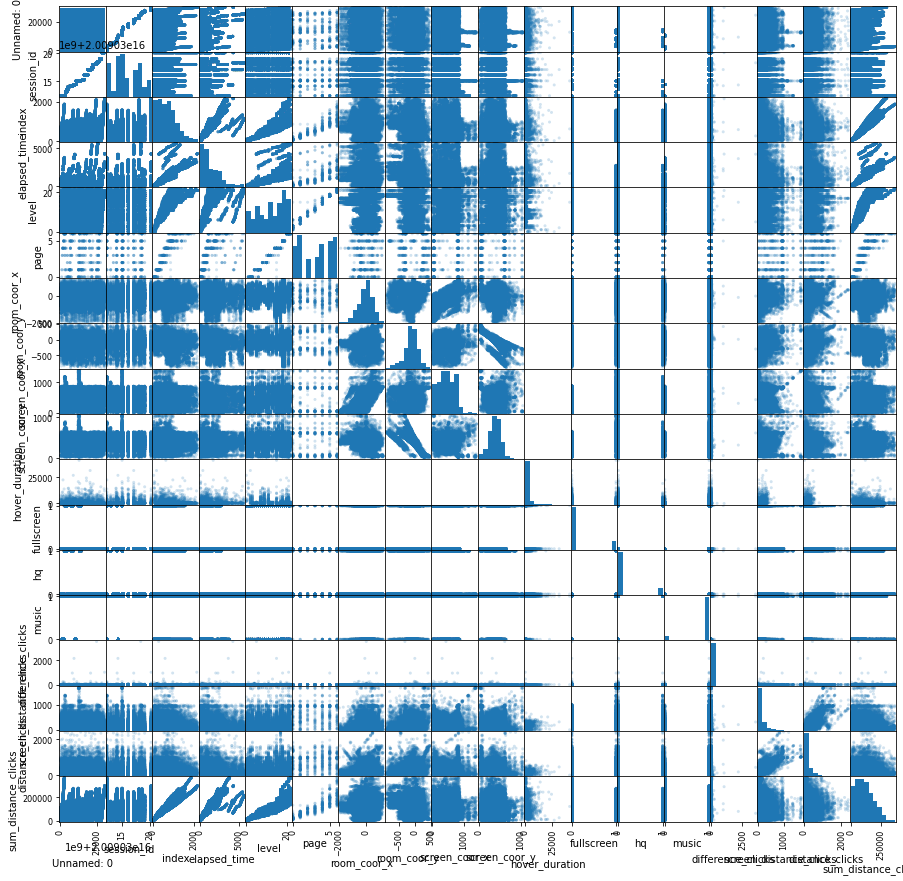

In [6]:
df_added_var = pd.read_csv('data/processed/df_added_variables.csv', nrows=30000)

pd.plotting.scatter_matrix(df_added_var, alpha=0.2, figsize=(15,15))

# Kernel SVM

[LibSVM]..................*..*
optimization finished, #iter = 20308
obj = -12661.606949, rho = -0.100792
nSV = 14140, nBSV = 9000
Total nSV = 14140
              precision    recall  f1-score   support

           0       0.62      0.52      0.56      3496
           1       0.59      0.69      0.64      3573

    accuracy                           0.61      7069
   macro avg       0.61      0.60      0.60      7069
weighted avg       0.61      0.61      0.60      7069



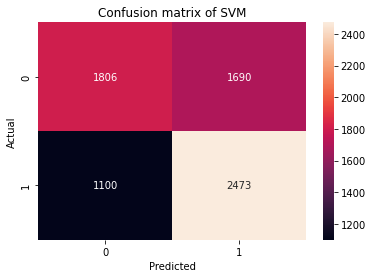

In [8]:
# Training a SVM classifier using SVC class
svm = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', verbose=True)
svm_pipe = make_pipeline(StandardScaler(), svm)
svm_pipe.fit(X_train, y_train)
 
eval_model(svm_pipe, "SVM")

# Linear SVM

[LibLinear].............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/Applications/anaconda3/envs/kaggle_gameplay/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


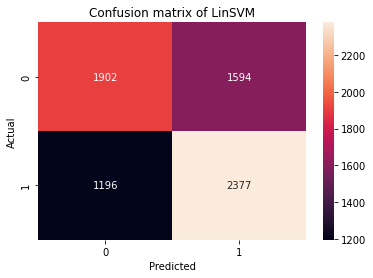

In [5]:
# Supposed to scale better for large datasets

# Training a SVM classifier using SVC class
lsvm = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=1.0, class_weight='balanced', verbose=True, max_iter=-1)
lsvm_pipe = make_pipeline(StandardScaler(), lsvm)
lsvm_pipe.fit(X_train, y_train)
 
eval_model(lsvm_pipe, "LinSVM")

# SGD Classifier (SVM, LogReg, Perceptron)

## Linear SVM - hinge loss - SGD

-- Epoch 1
Norm: 21.69, NNZs: 169, Bias: 0.826581, T: 16493, Avg. loss: 9.309397
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 9.93, NNZs: 169, Bias: 0.112286, T: 32986, Avg. loss: 2.025975
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 7.23, NNZs: 169, Bias: -0.391795, T: 49479, Avg. loss: 1.512738
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 5.17, NNZs: 169, Bias: 0.234477, T: 65972, Avg. loss: 1.295663
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 4.48, NNZs: 169, Bias: -0.144978, T: 82465, Avg. loss: 1.192341
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 6.71, NNZs: 169, Bias: 0.493745, T: 98958, Avg. loss: 1.172410
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 4.08, NNZs: 169, Bias: -0.000809, T: 115451, Avg. loss: 1.139418
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 3.74, NNZs: 169, Bias: 0.032750, T: 131944, Avg. loss: 1.046960
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 3.48, NNZs: 169, Bias: 0.048781, T: 148437, Avg. loss: 1.

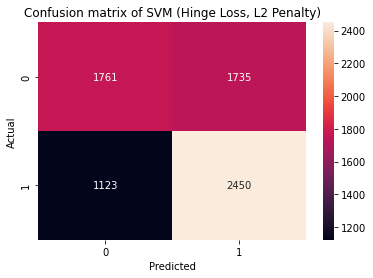

In [12]:
# Always scale the input. The most convenient way is to use a pipeline.
sgdc = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, class_weight='balanced', verbose=True)
clf = make_pipeline(StandardScaler(), sgdc)
clf.fit(X_train, y_train)

eval_model(clf, "SVM (Hinge Loss, L2 Penalty)")

## Logistic Regression - log loss - SGD

-- Epoch 1
Norm: 199.53, NNZs: 169, Bias: 3.439981, T: 16493, Avg. loss: 62.732755
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 172.07, NNZs: 169, Bias: 15.707437, T: 32986, Avg. loss: 14.284131
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 94.28, NNZs: 169, Bias: 1.234458, T: 49479, Avg. loss: 8.388425
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 61.90, NNZs: 169, Bias: -3.075420, T: 65972, Avg. loss: 5.440744
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 47.30, NNZs: 169, Bias: -0.469232, T: 82465, Avg. loss: 3.869142
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 40.70, NNZs: 169, Bias: 1.285411, T: 98958, Avg. loss: 3.188025
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 33.90, NNZs: 169, Bias: -1.449457, T: 115451, Avg. loss: 2.749269
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 29.67, NNZs: 169, Bias: -1.396591, T: 131944, Avg. loss: 2.355139
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 27.10, NNZs: 169, Bias: -1.138700, T: 148437

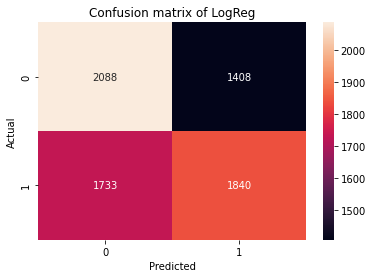

In [13]:
# Always scale the input. The most convenient way is to use a pipeline.
sgdc = SGDClassifier(loss='log_loss', verbose=True)
clf = make_pipeline(StandardScaler(), sgdc)
clf.fit(X_train, y_train)

eval_model(clf, "LogReg")

## Perceptron - elasticnet loss - SGD

-- Epoch 1
Norm: 224.79, NNZs: 161, Bias: -3.356698, T: 16493, Avg. loss: 74.307709
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 155.50, NNZs: 147, Bias: 0.812639, T: 32986, Avg. loss: 11.150185
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 143.11, NNZs: 142, Bias: -0.070903, T: 49479, Avg. loss: 5.916094
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 133.85, NNZs: 121, Bias: -0.645392, T: 65972, Avg. loss: 3.837612
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 129.23, NNZs: 115, Bias: -1.091670, T: 82465, Avg. loss: 2.853638
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 124.50, NNZs: 116, Bias: -0.253726, T: 98958, Avg. loss: 1.993665
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 121.86, NNZs: 104, Bias: 0.084748, T: 115451, Avg. loss: 1.623557
Total training time: 0.15 seconds.
-- Epoch 8
Norm: 125.02, NNZs: 102, Bias: 0.930976, T: 131944, Avg. loss: 1.804988
Total training time: 0.16 seconds.
-- Epoch 9
Norm: 119.82, NNZs: 82, Bias: 0.394634, T: 1

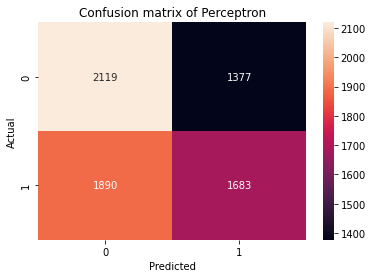

In [14]:
# Always scale the input. The most convenient way is to use a pipeline.
sgdc = SGDClassifier(loss='perceptron', penalty='elasticnet', verbose=True)
clf = make_pipeline(StandardScaler(), sgdc)
clf.fit(X_train, y_train)

eval_model(clf, "Perceptron")

# Decision Tree

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      3496
           1       0.54      0.55      0.54      3573

    accuracy                           0.54      7069
   macro avg       0.54      0.54      0.54      7069
weighted avg       0.54      0.54      0.54      7069



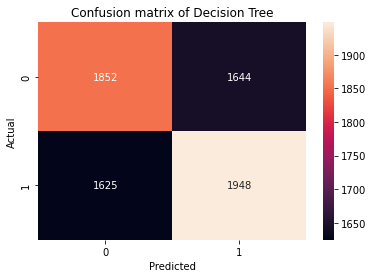

In [16]:
tree = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight='balanced')
tree_pipe = make_pipeline(StandardScaler(), tree)
tree_pipe.fit(X_train, y_train)

eval_model(tree_pipe, "Decision Tree")

# Extra Randomized Tree

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      3496
           1       0.54      0.55      0.55      3573

    accuracy                           0.54      7069
   macro avg       0.54      0.54      0.54      7069
weighted avg       0.54      0.54      0.54      7069



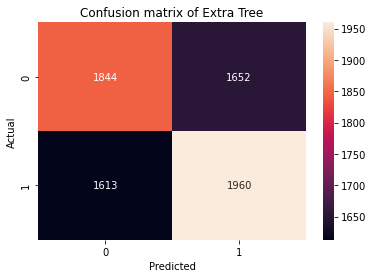

In [21]:
etree = ExtraTreeClassifier(criterion='gini', splitter='best', class_weight='balanced')
etree_pipe = make_pipeline(StandardScaler(), etree)
etree_pipe.fit(X_train, y_train)

eval_model(etree_pipe, "Extra Tree")

# MLP

Iteration 1, loss = 0.67677027
Iteration 2, loss = 0.65794056
Iteration 3, loss = 0.64960788
Iteration 4, loss = 0.64277417
Iteration 5, loss = 0.63681041
Iteration 6, loss = 0.62920907
Iteration 7, loss = 0.62355338
Iteration 8, loss = 0.61673623
Iteration 9, loss = 0.60896743
Iteration 10, loss = 0.59867300
Iteration 11, loss = 0.58932403
Iteration 12, loss = 0.58104705
Iteration 13, loss = 0.57287657
Iteration 14, loss = 0.56331468
Iteration 15, loss = 0.55244332
Iteration 16, loss = 0.54190724
Iteration 17, loss = 0.53499637
Iteration 18, loss = 0.52472995
Iteration 19, loss = 0.51116219
Iteration 20, loss = 0.50575382
Iteration 21, loss = 0.49365321
Iteration 22, loss = 0.48142475
Iteration 23, loss = 0.47606619
Iteration 24, loss = 0.46282890
Iteration 25, loss = 0.45399648
Iteration 26, loss = 0.44940995
Iteration 27, loss = 0.43863428
Iteration 28, loss = 0.42960682
Iteration 29, loss = 0.43304283
Iteration 30, loss = 0.41836639
Iteration 31, loss = 0.40801761
Iteration 32, los

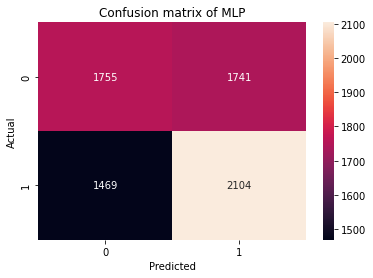

In [23]:
mlp = MLPClassifier((50, 100, 50), activation='relu', verbose=True)
mlp = make_pipeline(StandardScaler(), mlp)
mlp.fit(X_train, y_train)

eval_model(mlp, "MLP")


# Gaussian Process Classifier

In [26]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, max_iter_predict=2, warm_start=True)
gpc_pipe = make_pipeline(StandardScaler(), gpc)
gpc_pipe.fit(X_train, y_train)

eval_model(gpc_pipe, "Gaussian Process")

# Function to predict for all questions

In [6]:
def train(model, X_train, y_train, stdscaler: bool = True, normalizer: bool = False):
    if stdscaler and not normalizer:
        model_pp = make_pipeline(StandardScaler(), model)
    elif normalizer and not stdscaler:
        model_pp = make_pipeline(Normalizer(), model)
    elif stdscaler and normalizer:
        model_pp = make_pipeline(StandardScaler(), Normalizer(), model)
    model_pp.fit(X_train, y_train)
    return model_pp







In [8]:

labels['q'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=uint8)

In [12]:
data_all, labels = load_all_X_y()
model = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight='balanced')
models = {}

for q in labels['q'].unique():

    # get X
    if q <= 3: df = data_all['0_4']
    elif q <= 13: df = data_all['5_12']
    elif q <= 18: df = data_all['13_22']
    X = df.iloc[:, 2:].values
    # get y
    y = labels['correct'][labels['q'] == q].values
    # Creating training and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    # Train model
    clf = train(model, X_train, y_train)
    # Get accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Trained model for question {q}, accuracy: {round(acc, 2)}")
    models[f"Question_{q}"] = {'model' : clf, 'acc': acc} 
    
    

    

Trained model for question 1, accuracy: 0.64
Trained model for question 2, accuracy: 0.96
Trained model for question 3, accuracy: 0.88
Trained model for question 4, accuracy: 0.71
Trained model for question 5, accuracy: 0.54
Trained model for question 6, accuracy: 0.68
Trained model for question 7, accuracy: 0.64
Trained model for question 8, accuracy: 0.54
Trained model for question 9, accuracy: 0.64
Trained model for question 10, accuracy: 0.54
Trained model for question 11, accuracy: 0.56
Trained model for question 12, accuracy: 0.76
Trained model for question 13, accuracy: 0.63
Trained model for question 14, accuracy: 0.62
Trained model for question 15, accuracy: 0.54
Trained model for question 16, accuracy: 0.61
Trained model for question 17, accuracy: 0.58
Trained model for question 18, accuracy: 0.91
